In [1]:
import pandas as pd
import numpy as np

**Results based on last touch attribution modeling**

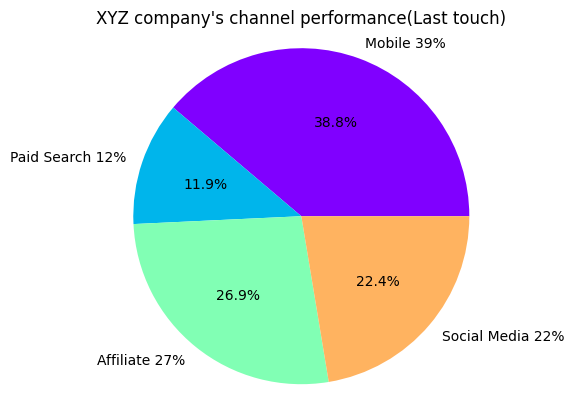

In [2]:
import matplotlib.pyplot as plt

# Define the data
mobile_p = 26/67
paid_search_p = 8/67
affiliate_p = 18/67
social_media_p = 15/67

# Ingredients for the pie chart
slices_actual = [mobile_p, paid_search_p, affiliate_p, social_media_p]
labels = ["Mobile", "Paid Search", "Affiliate", "Social Media"]
percentages = [round(p * 100) for p in slices_actual]

# Add percentages to labels
labels_with_percentages = [f"{label} {percentage}%" for label, percentage in zip(labels, percentages)]

# Create the pie chart with custom colors
plt.pie(slices_actual, labels=labels_with_percentages, autopct='%1.1f%%', colors=plt.cm.rainbow([i / len(labels) for i in range(len(labels))]))
plt.title("XYZ company's channel performance(Last touch)")

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

## Consumer path-to-purchase data

In [297]:
data=pd.read_csv('../Session 4 RMD Attribution Modeling/Data/knc_attribution.csv')

In [298]:
data

,users_id,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,...,channel38,channel39,channel40,channel41,channel42,channel43,channel44,channel45,user_purchase,null_purchase
0,1,mobile,paid_search,paid_search,paid_search,affiliate,mobile,paid_search,paid_search,social_media,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,2,paid_search,mobile,mobile,paid_search,affiliate,paid_search,mobile,paid_search,mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,3,social_media,social_media,mobile,affiliate,social_media,paid_search,mobile,mobile,affiliate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,4,mobile,affiliate,mobile,social_media,affiliate,mobile,social_media,mobile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,5,paid_search,paid_search,affiliate,paid_search,mobile,paid_search,paid_search,affiliate,mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,101,affiliate,paid_search,affiliate,social_media,social_media,mobile,affiliate,paid_search,paid_search,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
101,102,paid_search,paid_search,social_media,paid_search,mobile,affiliate,paid_search,mobile,paid_search,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
102,103,paid_search,social_media,mobile,social_media,social_media,paid_search,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
103,104,social_media,paid_search,social_media,mobile,mobile,mobile,paid_search,affiliate,affiliate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [299]:
data['user_purchase'].value_counts()

1    83
0    22
Name: user_purchase, dtype: int64

Looking at the dataset attribution from the upper right corner of the R Studio screen, we see that we are given 105 unique online consumer journeys, of which 89 turned into conversion. This corresponds to 85% of conversion rate. Note that this conversion rate is quite high. We typically observe such high conversion rates around heavy promotional times.

In [300]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame
data_temp = {
    "Variable": ["users_id", "channeln", "user_purchase", "null_purchase"],
    "Description": [
        "Unique user ID",
        "Online advertising (i.e., mobile, paid search, affiliate, and social media) exposure path, with channel1 referring to the first exposure, channel2 the second, ..., channeln the nth (maximum number of exposure = 45).",
        "Consumer final conversion indicator, which takes value of 1 if a specific consumer made a purchase (i.e., converted) at the end of her path, and 0 otherwise.",
        "The opposite of 'user_purchase', taking value of 1 if there is no purchase and 0 otherwise.",
    ]
}

var_desc = pd.DataFrame(data_temp)

# Print the table
print(tabulate(var_desc, headers="keys", tablefmt="grid"))


+----+---------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | Variable      | Description                                                                                                                                                                                                             |
+====+===============+=========================================================================================================================================================================================================================+
|  0 | users_id      | Unique user ID                                                                                                                                                                                                          |
+----+---------------+--------------

**Markov chain approach - Data preparation phase**

We start by knitting consumer advertising exposures into a desired 'sequenced path' format for the analysis.The below code generates 'conversion sequences' for all consumers.

In [301]:
for id,temp in data.iloc[:,1:len(data.columns)-2].iterrows():
    my_list = [str(item) for item in temp.values if not pd.isna(item)]
    #print(id)
    print(my_list)
    data.loc[id,'path']=">".join(my_list)
    

['mobile', 'paid_search', 'paid_search', 'paid_search', 'affiliate', 'mobile', 'paid_search', 'paid_search', 'social_media', 'mobile', 'social_media', 'paid_search', 'social_media', 'mobile', 'affiliate', 'paid_search', 'paid_search']
['paid_search', 'mobile', 'mobile', 'paid_search', 'affiliate', 'paid_search', 'mobile', 'paid_search', 'mobile', 'mobile', 'paid_search', 'affiliate', 'affiliate', 'affiliate', 'affiliate', 'paid_search', 'affiliate', 'affiliate', 'affiliate', 'affiliate', 'affiliate', 'paid_search', 'affiliate']
['social_media', 'social_media', 'mobile', 'affiliate', 'social_media', 'paid_search', 'mobile', 'mobile', 'affiliate']
['mobile', 'affiliate', 'mobile', 'social_media', 'affiliate', 'mobile', 'social_media', 'mobile']
['paid_search', 'paid_search', 'affiliate', 'paid_search', 'mobile', 'paid_search', 'paid_search', 'affiliate', 'mobile', 'affiliate', 'paid_search', 'affiliate', 'affiliate', 'affiliate', 'affiliate', 'paid_search', 'mobile', 'affiliate', 'paid_s

In [302]:
data['path']

0      mobile>paid_search>paid_search>paid_search>aff...
1      paid_search>mobile>mobile>paid_search>affiliat...
2      social_media>social_media>mobile>affiliate>soc...
3      mobile>affiliate>mobile>social_media>affiliate...
4      paid_search>paid_search>affiliate>paid_search>...
                             ...                        
100    affiliate>paid_search>affiliate>social_media>s...
101    paid_search>paid_search>social_media>paid_sear...
102    paid_search>social_media>mobile>social_media>s...
103    social_media>paid_search>social_media>mobile>m...
104    mobile>mobile>paid_search>paid_search>affiliat...
Name: path, Length: 105, dtype: object

In [303]:
import regex 
data['path'] = data['path'].str.replace(r'\s.*', '', regex=True)
data['cleaned_path'] = data['path'].str.replace(r'\W$', '', regex=True)

In [304]:
data.head()

,users_id,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,...,channel40,channel41,channel42,channel43,channel44,channel45,user_purchase,null_purchase,path,cleaned_path
0,1,mobile,paid_search,paid_search,paid_search,affiliate,mobile,paid_search,paid_search,social_media,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,mobile>paid_search>paid_search>paid_search>aff...,mobile>paid_search>paid_search>paid_search>aff...
1,2,paid_search,mobile,mobile,paid_search,affiliate,paid_search,mobile,paid_search,mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,paid_search>mobile>mobile>paid_search>affiliat...,paid_search>mobile>mobile>paid_search>affiliat...
2,3,social_media,social_media,mobile,affiliate,social_media,paid_search,mobile,mobile,affiliate,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,social_media>social_media>mobile>affiliate>soc...,social_media>social_media>mobile>affiliate>soc...
3,4,mobile,affiliate,mobile,social_media,affiliate,mobile,social_media,mobile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,mobile>affiliate>mobile>social_media>affiliate...,mobile>affiliate>mobile>social_media>affiliate...
4,5,paid_search,paid_search,affiliate,paid_search,mobile,paid_search,paid_search,affiliate,mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,paid_search>paid_search>affiliate>paid_search>...,paid_search>paid_search>affiliate>paid_search>...


In [305]:
data['path'][0]

'mobile>paid_search>paid_search>paid_search>affiliate>mobile>paid_search>paid_search>social_media>mobile>social_media>paid_search>social_media>mobile>affiliate>paid_search>paid_search'

For model estimation, we decide to take the first 80 consumers in the dataset as our training set and keep the remaining 25 observations for the test set. The below code chunk splits the data into training and test sets.

In [306]:
data_train=data.iloc[:80]


In [393]:
data_test=data.iloc[80:105]

In [ ]:
data_test.iloc[0,]

In [308]:
data_train.shape

(80, 50)

In [38]:
data_test.shape

(25, 50)

In [39]:
data.columns

Index(['users_id', 'channel1', 'channel2', 'channel3', 'channel4', 'channel5',
       'channel6', 'channel7', 'channel8', 'channel9', 'channel10',
       'channel11', 'channel12', 'channel13', 'channel14', 'channel15',
       'channel16', 'channel17', 'channel18', 'channel19', 'channel20',
       'channel21', 'channel22', 'channel23', 'channel24', 'channel25',
       'channel26', 'channel27', 'channel28', 'channel29', 'channel30',
       'channel31', 'channel32', 'channel33', 'channel34', 'channel35',
       'channel36', 'channel37', 'channel38', 'channel39', 'channel40',
       'channel41', 'channel42', 'channel43', 'channel44', 'channel45',
       'user_purchase', 'null_purchase', 'path', 'cleaned_path'],
      dtype='object')

As a final preparatory step, we need to create a 'channel stack', through which we summarize consumer paths and calculate the total number of conversions (frequency)and non-conversions for each path pattern. The following code chunk will help us generate that channel stack:

In [40]:
grouped_data=data_train.groupby('cleaned_path').sum().reset_index()

In [41]:
grouped_data.columns

Index(['cleaned_path', 'users_id', 'user_purchase', 'null_purchase'], dtype='object')

In [42]:
grouped_data.drop('users_id',axis=1,inplace=True)

In [43]:
grouped_data

,cleaned_path,user_purchase,null_purchase
0,affiliate>mobile>affiliate>social_media>social...,1,0
1,affiliate>paid_search>affiliate>paid_search>af...,1,0
2,affiliate>paid_search>affiliate>paid_search>mo...,1,0
3,affiliate>paid_search>affiliate>paid_search>so...,4,0
4,affiliate>paid_search>affiliate>social_media>s...,2,2
5,affiliate>paid_search>paid_search>mobile>affil...,5,0
6,mobile>affiliate>mobile>social_media>affiliate...,2,0
7,mobile>mobile>affiliate>paid_search>affiliate>...,1,0
8,mobile>mobile>social_media>social_media>affili...,5,0
9,mobile>paid_search>affiliate>paid_search>mobil...,0,1


**Markov chain modeling**

To estimate the Markov chain model, we use the markov_model function. Specifically, we estimate a third-order Markov model so that the 'memory' of the chain goes back to the most recent three states. Our assumption here is that consumer journeys typically cannot be restricted to the most recent state, i.e., consumers have a longer memory. Recall that first-order Markov model assumes that the current state is only determined by the previous or the most recent state.

In [44]:
#pip install --upgrade setuptools

In [45]:
#pip install Cython

In [46]:
#pip install ChannelAttribution

In [47]:
import ChannelAttribution

**Testing the package using sample data**

In [48]:
test=pd.read_csv('https://channelattribution.io/csv/Data.csv',sep=";")

In [49]:
test.head()

,path,total_conversions,total_conversion_value,total_null
0,eta > iota > alpha > eta,1,0.244,3
1,iota > iota > iota > iota,2,3.195,6
2,alpha > iota > alpha > alpha > alpha > iota > ...,2,6.754,6
3,beta > eta,1,2.402,3
4,iota > eta > theta > lambda > lambda > theta >...,0,0.000,2


In [50]:
markov_test=ChannelAttribution.auto_markov_model(Data=test,var_path='path',var_conv='total_conversions',var_null='total_null',plot=True)

Suggested order: 4
Number of simulations: 100000 - Convergence reached: 3.19% < 5.00%
Percentage of simulated paths that successfully end before maximum number of steps (67) is reached: 99.99%
*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product


**Trying on our actual grouped dataset**

In [51]:
grouped_data

,cleaned_path,user_purchase,null_purchase
0,affiliate>mobile>affiliate>social_media>social...,1,0
1,affiliate>paid_search>affiliate>paid_search>af...,1,0
2,affiliate>paid_search>affiliate>paid_search>mo...,1,0
3,affiliate>paid_search>affiliate>paid_search>so...,4,0
4,affiliate>paid_search>affiliate>social_media>s...,2,2
5,affiliate>paid_search>paid_search>mobile>affil...,5,0
6,mobile>affiliate>mobile>social_media>affiliate...,2,0
7,mobile>mobile>affiliate>paid_search>affiliate>...,1,0
8,mobile>mobile>social_media>social_media>affili...,5,0
9,mobile>paid_search>affiliate>paid_search>mobil...,0,1


In [187]:
markov=ChannelAttribution.markov_model(Data=grouped_data,var_path='cleaned_path',var_conv='user_purchase',var_null='null_purchase',order=3)

Number of simulations: 100000 - Convergence reached: 0.31% < 5.00%
Percentage of simulated paths that successfully end before maximum number of steps (44) is reached: 92.25%
*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product


In [188]:
markov

,channel_name,total_conversions
0,affiliate,16.223466
1,mobile,17.766056
2,social_media,15.664695
3,paid_search,17.345784


In [189]:
markov_df=pd.DataFrame({'channel':markov['channel_name'],'total_conversions':round(markov['total_conversions']),'percent':round((markov['total_conversions']/sum(data_train['user_purchase'])),3)})

In [190]:
markov_df

,channel,total_conversions,percent
0,affiliate,16.0,0.242
1,mobile,18.0,0.265
2,social_media,16.0,0.234
3,paid_search,17.0,0.259


In [191]:
markov_df.sort_values(by='percent',ascending=False)

,channel,total_conversions,percent
1,mobile,18.0,0.265
3,paid_search,17.0,0.259
0,affiliate,16.0,0.242
2,social_media,16.0,0.234


The results based on Markov chain model tells us quite a different story compared to the last-touch heuristic.

Markov chain model informs us that:

The effectiveness of four touchpoints in driving conversions do not differ dramatically from each other.

Both social media advertising and affiliate advertising contribute around 24% to conversion while both paid search and mobile channels contribute around 26%.

To further make sense of what we have found, we can obtain the transition probabilities between all states through the following codes:

In [61]:
markov_transition=ChannelAttribution.transition_matrix(Data=grouped_data,var_path='cleaned_path',var_conv='user_purchase',var_null='null_purchase',order=3)

*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product


In [66]:
markov_transition['channels']

,id_channel,channel_name
0,1,affiliate
1,2,mobile
2,3,social_media
3,4,paid_search


In [68]:
markov_transition['transition_matrix']

,channel_from,channel_to,transition_probability
0,(start),1 2 1,0.0125
1,(start),1 4 1,0.1250
2,(start),1 4 4,0.0625
3,(start),2 1 2,0.0250
4,(start),2 2 1,0.0125
...,...,...,...
229,1 3 1,3 1 3,0.5000
230,1 3 1,3 1 1,0.5000
231,1 1 3,1 3 4,1.0000
232,3 4 1,(conversion),0.8000


In [69]:
data = {
    'channel_3rd_order': ["social_network>paid_search>affiliate", "mobile>social_media>mobile", 
                          "mobile>mobile>mobile", "mobile>mobile>affiliate", 
                          "paid_search>affiliate>mobile", "social_media>affiliate>social_media",
                          "social_media>social_media>affiliate", "social_media>social_media>mobile", 
                          "social_media>mobile>affiliate", "mobile>mobile>paid_search", 
                          "mobile>paid_search>paid_search", "paid_search>paid_search>mobile", 
                          "mobile>paid_search>mobile", "paid_search>paid_search>social_media",
                          "paid_search>mobile>paid_search"],
    'transition_probability': [0.455, 0.273, 0.250, 0.238, 0.227, 0.200, 0.190, 0.161, 0.156, 
                               0.125, 0.116, 0.100, 0.097, 0.09, 0.086]
}

# Create a DataFrame
markov_result = pd.DataFrame(data)

# Display the DataFrame
markov_result

,channel_3rd_order,transition_probability
0,social_network>paid_search>affiliate,0.455
1,mobile>social_media>mobile,0.273
2,mobile>mobile>mobile,0.250
3,mobile>mobile>affiliate,0.238
4,paid_search>affiliate>mobile,0.227
5,social_media>affiliate>social_media,0.200
6,social_media>social_media>affiliate,0.190
7,social_media>social_media>mobile,0.161
8,social_media>mobile>affiliate,0.156
9,mobile>mobile>paid_search,0.125


For example, we can see that consumers with the last three channel exposures Social Media > Paid Search > Affiliate has the highest conversion probability (p=0.455).

We can imagine that such a path might highly describe a teenage consumer behaviour online. They are attracted by fancy social network advertising on Instagram or Facebook. Then, they click on paid search advertising to get further information about the product.Later, they get further enticed by repeatedly browsing on affiliate websites, and finally decide to purchase the product

## Visualisation

Markov graph

A Markov graph helps us further understand the paths that consumers in our dataset have taken towards conversion and non-conversion. We could plot Markov graph for the third-order Markov chain model that we just estimated. However, due to complexity in visual representation of the third-order model, here we obtain a graph of the first-order Markov chain model to illustrate how to interpret such graphs from Markov chain models.

Running the code chunks below gets us a nice-looking Markov graph.

In [99]:
markov_transition_first_order=ChannelAttribution.transition_matrix(Data=grouped_data,var_path='cleaned_path',var_conv='user_purchase',var_null='null_purchase',order=1)

*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product


In [100]:
markov_transition_first_order['channels']

,id_channel,channel_name
0,1,affiliate
1,2,mobile
2,3,social_media
3,4,paid_search


In [123]:
trans_matrix=markov_transition_first_order['transition_matrix']

In [124]:
df_dummy=pd.DataFrame({'channel_from':['(start)','(conversion)','(null)'],'channel_to':['(start)','(conversion)','(null)'],trans_matrix.columns.values[2]:[0,1,1]})

In [125]:
df_dummy

,channel_from,channel_to,transition_probability
0,(start),(start),0
1,(conversion),(conversion),1
2,(null),(null),1


In [126]:
trans_matrix

,channel_from,channel_to,transition_probability
0,(start),1,0.200000
1,(start),2,0.275000
2,(start),4,0.387500
3,(start),3,0.137500
4,1,2,0.185286
5,1,3,0.188011
6,1,4,0.356948
7,1,1,0.212534
8,1,(conversion),0.049046
9,1,(null),0.008174


In [127]:
trans_matrix_1st=pd.concat([df_dummy,trans_matrix],axis=0)

In [128]:
trans_matrix_1st

,channel_from,channel_to,transition_probability
0,(start),(start),0.000000
1,(conversion),(conversion),1.000000
2,(null),(null),1.000000
0,(start),1,0.200000
1,(start),2,0.275000
2,(start),4,0.387500
3,(start),3,0.137500
4,1,2,0.185286
5,1,3,0.188011
6,1,4,0.356948


In [129]:
markov_transition_first_order['channels']

,id_channel,channel_name
0,1,affiliate
1,2,mobile
2,3,social_media
3,4,paid_search


In [130]:
"',".join([i for i in markov_transition_first_order['channels']['channel_name']])

"affiliate',mobile',social_media',paid_search"

In [131]:
markov_transition_first_order['channels']

,id_channel,channel_name
0,1,affiliate
1,2,mobile
2,3,social_media
3,4,paid_search


In [132]:
levels = ['(start)', '(conversion)', '(null)', '2', '4', '1', '3']

# Factorize the 'channel_from' and 'channel_to' columns
trans_matrix_1st['channel_from'] = pd.Categorical(trans_matrix_1st['channel_from'], categories=levels)
trans_matrix_1st['channel_to'] = pd.Categorical(trans_matrix_1st['channel_to'], categories=levels)

# Perform the equivalent of dcast in R
trans_matrix_1st = pd.pivot_table(trans_matrix_1st, index='channel_from', columns='channel_to', values='transition_probability', aggfunc='first')

# Replace NaN values with 0
trans_matrix_1st = trans_matrix_1st.fillna(0)



In [109]:
trans_matrix_1st

channel_to,(start),(conversion),(null),3,1,4,2
channel_from,,,,,,,
(start),0.0,0.000000,0.000000,0.137500,0.200000,0.387500,0.275000
(conversion),0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(null),0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.012346,0.003086,0.212963,0.237654,0.151235,0.382716
1,0.0,0.049046,0.008174,0.188011,0.212534,0.356948,0.185286
4,0.0,0.041485,0.008734,0.240175,0.231441,0.213974,0.264192
2,0.0,0.057018,0.010965,0.142544,0.197368,0.326754,0.265351


In [117]:
trans_matrix_1st

channel_to,(start),(conversion),(null),1,2,3,4
channel_from,,,,,,,
(start),0.0,0.000000,0.000000,0.200000,0.275000,0.137500,0.387500
(conversion),0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(null),0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.049046,0.008174,0.212534,0.185286,0.188011,0.356948
2,0.0,0.057018,0.010965,0.197368,0.265351,0.142544,0.326754
3,0.0,0.012346,0.003086,0.237654,0.382716,0.212963,0.151235
4,0.0,0.041485,0.008734,0.231441,0.264192,0.240175,0.213974


In [133]:
trans_matrix_1st

channel_to,(start),(conversion),(null),2,4,1,3
channel_from,,,,,,,
(start),0.0,0.000000,0.000000,0.275000,0.387500,0.200000,0.137500
(conversion),0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(null),0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.057018,0.010965,0.265351,0.326754,0.197368,0.142544
4,0.0,0.041485,0.008734,0.264192,0.213974,0.231441,0.240175
1,0.0,0.049046,0.008174,0.185286,0.356948,0.212534,0.188011
3,0.0,0.012346,0.003086,0.382716,0.151235,0.237654,0.212963


In [134]:
trans_matrix_1st.index = trans_matrix_1st.index.map({
    '1': 'affiliate',
    '2': 'mobile',
    '3': 'social_media',
    '4': 'paid_search',
    '(start)': '(start)',
    '(conversion)': '(conversion)',
    '(null)': '(null)'
})

trans_matrix_1st.columns = trans_matrix_1st.columns.map({
    '1': 'affiliate',
    '2': 'mobile',
    '3': 'social_media',
    '4': 'paid_search',
    '(start)': '(start)',
    '(conversion)': '(conversion)',
    '(null)': '(null)'
})

In [135]:
trans_matrix_1st

channel_to,(start),(conversion),(null),mobile,paid_search,affiliate,social_media
channel_from,,,,,,,
(start),0.0,0.000000,0.000000,0.275000,0.387500,0.200000,0.137500
(conversion),0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(null),0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
mobile,0.0,0.057018,0.010965,0.265351,0.326754,0.197368,0.142544
paid_search,0.0,0.041485,0.008734,0.264192,0.213974,0.231441,0.240175
affiliate,0.0,0.049046,0.008174,0.185286,0.356948,0.212534,0.188011
social_media,0.0,0.012346,0.003086,0.382716,0.151235,0.237654,0.212963


In [136]:
trans_matrix1=trans_matrix_1st.to_numpy()

In [137]:
trans_matrix1

array([[0.        , 0.        , 0.        , 0.275     , 0.3875    ,
        0.2       , 0.1375    ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.05701754, 0.01096491, 0.26535088, 0.32675439,
        0.19736842, 0.14254386],
       [0.        , 0.04148472, 0.00873362, 0.26419214, 0.2139738 ,
        0.23144105, 0.24017467],
       [0.        , 0.04904632, 0.00817439, 0.1852861 , 0.35694823,
        0.21253406, 0.1880109 ],
       [0.        , 0.01234568, 0.00308642, 0.38271605, 0.15123457,
        0.23765432, 0.21296296]])

In [138]:
import networkx as nx
import matplotlib.pyplot as plt

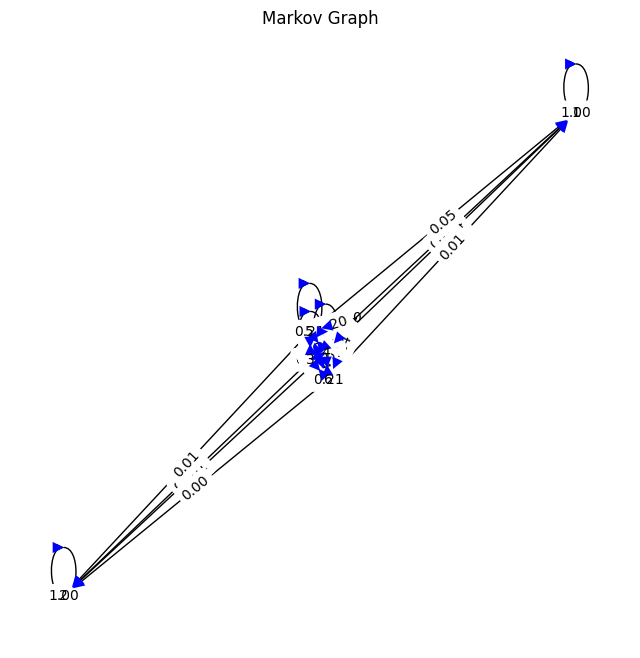

In [144]:
# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes to the graph
for i in range(len(trans_matrix1)):
    G.add_node(str(i))

# Add edges to the graph with labels for transition probabilities
for i in range(len(trans_matrix1)):
    for j in range(len(trans_matrix1[i])):
        if trans_matrix1[i][j] > 0:
            G.add_edge(str(i), str(j), label=f'{trans_matrix1[i][j]:.2f}')

# Create a plot with arrow sizes and labels
edge_labels = {(i, j): label for (i, j, label) in G.edges(data='label')}
edge_arrow_sizes = [0.01 * trans_matrix1[int(i)][int(j)] for (i, j) in G.edges()]

pos = nx.spring_layout(G, seed=42)  # Adjust layout as needed

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=0, node_color="yellow", font_size=10, node_shape="o", ax=ax)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
nx.draw_networkx_edges(G, pos, width=edge_arrow_sizes, edge_color="blue", arrowsize=20, ax=ax)

plt.title("Markov Graph")
plt.show()

**Transistion matrix heatmap**

In [147]:
trans_matrix1

array([[0.        , 0.        , 0.        , 0.275     , 0.3875    ,
        0.2       , 0.1375    ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.05701754, 0.01096491, 0.26535088, 0.32675439,
        0.19736842, 0.14254386],
       [0.        , 0.04148472, 0.00873362, 0.26419214, 0.2139738 ,
        0.23144105, 0.24017467],
       [0.        , 0.04904632, 0.00817439, 0.1852861 , 0.35694823,
        0.21253406, 0.1880109 ],
       [0.        , 0.01234568, 0.00308642, 0.38271605, 0.15123457,
        0.23765432, 0.21296296]])

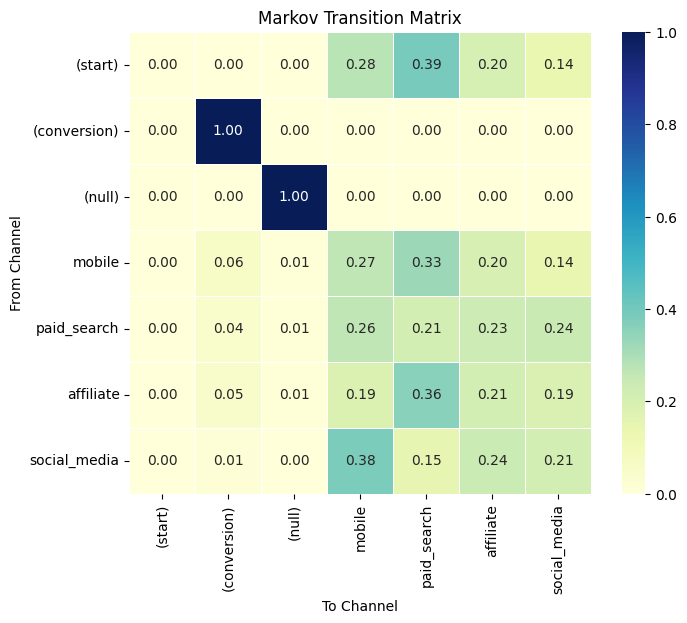

In [148]:
#importing seaborn library
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(trans_matrix_1st, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, square=True)

plt.title("Markov Transition Matrix")
plt.xlabel("To Channel")
plt.ylabel("From Channel")
plt.show()

In the transition matrix heatmap, the rows represent the 'starting point' and the columns represent the 'ending point' of each one-step transition.From this heatmap, we can reach the same conclusions as with the Markov graph.

Note that there are no rows representing conversion or null states on the matrix because in our setting there are no paths starting from a conversion or starting from a non-conversion. That is also why the cells referring to the transition from start to conversion and null are empty.

**Model comparison**

In [192]:
grouped_data.head()

,cleaned_path,user_purchase,null_purchase
0,affiliate>mobile>affiliate>social_media>social...,1,0
1,affiliate>paid_search>affiliate>paid_search>af...,1,0
2,affiliate>paid_search>affiliate>paid_search>mo...,1,0
3,affiliate>paid_search>affiliate>paid_search>so...,4,0
4,affiliate>paid_search>affiliate>social_media>s...,2,2


In [193]:
heuristic=ChannelAttribution.heuristic_models(grouped_data,'cleaned_path','user_purchase','null_purchase',sep='>')

*** Looking to run more advanced attribution? Try ChannelAttribution Pro for free! Visit https://channelattribution.io/product


In [194]:
heuristic

,channel_name,first_touch_conversions,first_touch_value,last_touch_conversions,last_touch_value,linear_touch_conversions,linear_touch_value
0,affiliate,14.0,2.0,18.0,3.0,15.162857,2.438083
1,mobile,17.0,5.0,26.0,5.0,18.674562,3.728596
2,social_media,8.0,3.0,4.0,1.0,14.412425,2.846028
3,paid_search,28.0,3.0,19.0,4.0,18.750157,3.987293


**Summarize results of all 3 into one table**

In [195]:
first_touch_percentage=round((heuristic['first_touch_conversions']/sum(data_train['user_purchase'])),3)

In [196]:
last_touch_percentage=round((heuristic['last_touch_conversions']/sum(data_train['user_purchase'])),3)

In [197]:
last_touch_percentage

0    0.269
1    0.388
2    0.060
3    0.284
Name: last_touch_conversions, dtype: float64

In [198]:
first_touch_percentage

0    0.209
1    0.254
2    0.119
3    0.418
Name: first_touch_conversions, dtype: float64

In [199]:
markov_df=pd.DataFrame({'channel':markov['channel_name'],'total_conversions':round(markov['total_conversions']),'percent':round((markov['total_conversions']/sum(data_train['user_purchase'])),3)})

In [200]:
markov_df

,channel,total_conversions,percent
0,affiliate,16.0,0.242
1,mobile,18.0,0.265
2,social_media,16.0,0.234
3,paid_search,17.0,0.259


In [210]:
table_summary=pd.DataFrame({"Item":heuristic['channel_name'],"First_touch":first_touch_percentage,"last_touch":last_touch_percentage,"Markov_chain":markov_df['percent']})

In [220]:
table_summary=table_summary.set_index('Item')

In [223]:
table_summary=table_summary.transpose()

The table above suggests that one can get to very different conclusions by adopting first-touch, last-touch, and Markov chain approach, respectively. Such difference is even clearer if we contrast model results by plotting a bar chart:

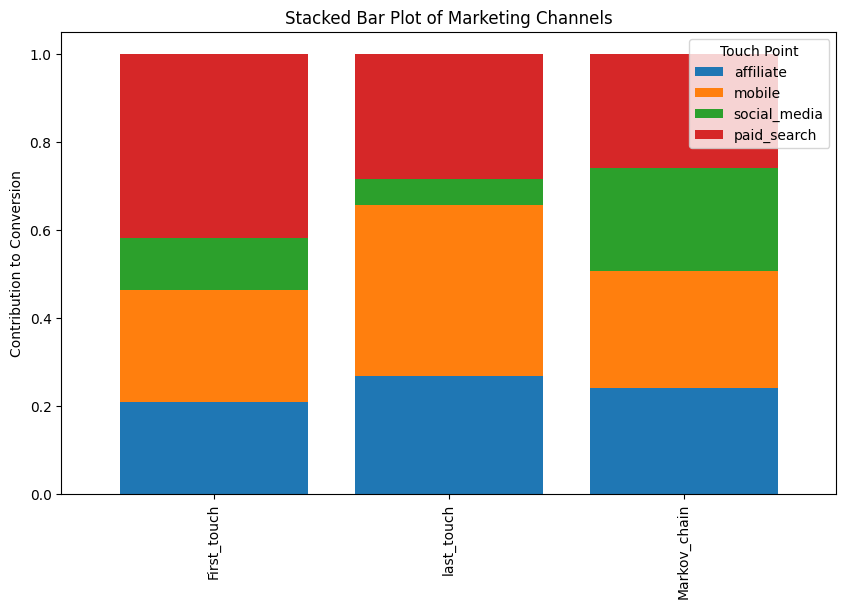

In [224]:


# Create a stacked bar plot
ax = table_summary.plot(kind='bar', stacked=True, figsize=(10, 6),width=0.8)

# Customize the plot
ax.set_title('Stacked Bar Plot of Marketing Channels')
ax.set_ylabel('Contribution to Conversion')
ax.legend(title='Touch Point')

# Show the plot
plt.show()

While first-touch model guides KNC to invest more in paid search and less in social media, last-touch model would suggest strong influence of mobile advertising. Finally, Markov graph approach suggests that the contribution made by all four touchpoints are actually quite evenly distributed.

Which model should KNC choose?

There are two options available for KNC when deciding which model to choose:

KNC should try to make sense of these results, first. Prisha can combine the model-based evidence with her managerial intuition. Given her concerns about the touch-based models, Prisha is advised to make her next budget allocation decisions based on Markov chain model output. At the end of the campaign period, she can assess whether there is a significant improvement in conversion rates.

Alternative approach would be to assess the predictive power of attribution models by using a larger dataset. Research on attribution models demonstrate that Markov chain models provide a fairer allocation of weights to channels and perform better than heuristic (e.g., first-touch and last-touch) methods in predicting conversion rates because they take into account the interplay across touchpoints and sequentiality in a customer journey (Anders et al. 2016).In appendix, we illustrate how predictive performance of these models can be assessed using the current dataset. In our illustration, Markov model performs better than heuristic methods. However, we take those results with a grain of salt because some paths to purchase occur only a few times in the test set, which may make conversion probabilities less reliable.

***What if a particular touchpoint is removed?***

What would have happened to conversion rate when a particular channel was removed from path-to-purchase? To address this question, we will use Shapley value-based approach.

## Shapley value-based approach

This modelling approach allows us to evaluate the relative importance of a customer touchpoint to *conversion*.

Using mobile marketing as an example, we will calculate the **drop** in conversion probability. The scale of the drop will be the importance of mobile marketing in converting customers. Specifically, we will calculate the following:


\begin{equation}
\text { (No.ofconversions/No. ofobservations) - (No.ofconversions } \left._{\text {nomobile }} / \text { No. ofobservations } \text { nomobile }\right)
\end{equation}



The below code chunk searches if each of the paths contains mobile, paid search, affiliate, and social media or not. Then, it generates four indicator variables.

In [227]:
grouped_data.head()

,cleaned_path,user_purchase,null_purchase
0,affiliate>mobile>affiliate>social_media>social...,1,0
1,affiliate>paid_search>affiliate>paid_search>af...,1,0
2,affiliate>paid_search>affiliate>paid_search>mo...,1,0
3,affiliate>paid_search>affiliate>paid_search>so...,4,0
4,affiliate>paid_search>affiliate>social_media>s...,2,2


In [229]:
grouped_data.columns=['cleaned_path','conversion','non_conversion']

In [232]:
# Search if each of the paths contains mobile, paid search, affiliate, and social media or not, and generate four indicator variables.

# Generate indicator variables for each channel
grouped_data['with_mobile'] = grouped_data['cleaned_path'].str.contains('mobile', case=False)
grouped_data['with_paid_search'] = grouped_data['cleaned_path'].str.contains('paid_search', case=False)
grouped_data['with_affiliate'] = grouped_data['cleaned_path'].str.contains('affiliate', case=False)
grouped_data['with_social_media'] = grouped_data['cleaned_path'].str.contains('social_media', case=False)

# Calculate variables for no_mobile
grouped_data['no_mobile_conversion'] = grouped_data.apply(lambda row: row['conversion'] if not row['with_mobile'] else 0, axis=1)
grouped_data['no_mobile_count'] = grouped_data.apply(lambda row: (row['conversion'] + row['non_conversion']) if not row['with_mobile'] else 0, axis=1)

# Calculate variables for no_paid_search
grouped_data['no_paidsearch_conversion'] = grouped_data.apply(lambda row: row['conversion'] if not row['with_paid_search'] else 0, axis=1)
grouped_data['no_paidsearch_count'] = grouped_data.apply(lambda row: (row['conversion'] + row['non_conversion']) if not row['with_paid_search'] else 0, axis=1)

# Calculate variables for no_affiliate
grouped_data['no_affiliate_conversion'] = grouped_data.apply(lambda row: row['conversion'] if not row['with_affiliate'] else 0, axis=1)
grouped_data['no_affiliate_count'] = grouped_data.apply(lambda row: (row['conversion'] + row['non_conversion']) if not row['with_affiliate'] else 0, axis=1)

# Calculate variables for no_social_media
grouped_data['no_social_media_conversion'] = grouped_data.apply(lambda row: row['conversion'] if not row['with_social_media'] else 0, axis=1)
grouped_data['no_social_media_count'] = grouped_data.apply(lambda row: (row['conversion'] + row['non_conversion']) if not row['with_social_media'] else 0, axis=1)



Next, we compute the Shapley values for each customer touchpoint and convert them to percentage terms.

In [262]:
total_conversions = grouped_data['conversion'].sum()

total_observations = 105

# Calculate Shapley values for each channel
shapley_mobile = (total_conversions / total_observations) - ((total_conversions - grouped_data['no_mobile_conversion'].sum()) / (total_observations - grouped_data['no_mobile_count'].sum()))
shapley_paidsearch = (total_conversions / total_observations) - ((total_conversions - grouped_data['no_paidsearch_conversion'].sum()) / (total_observations - grouped_data['no_paidsearch_count'].sum()))
shapley_affiliate = (total_conversions / total_observations) - ((total_conversions - grouped_data['no_affiliate_conversion'].sum()) / (total_observations - grouped_data['no_affiliate_count'].sum()))
shapley_socialmedia = (total_conversions / total_observations) - ((total_conversions - grouped_data['no_social_media_conversion'].sum()) / (total_observations - grouped_data['no_social_media_count'].sum()))

print("Shapley Value for Mobile:", shapley_mobile)
print("Shapley Value for Paid Search:", shapley_paidsearch)
print("Shapley Value for Affiliate:", shapley_affiliate)
print("Shapley Value for Social Media:", shapley_socialmedia)

Shapley Value for Mobile: 0.010644257703081195
Shapley Value for Paid Search: 0.010644257703081195
Shapley Value for Affiliate: 0.0034798534798534675
Shapley Value for Social Media: 0.008095238095238044


In [263]:
# Convert Shapley values to percentage terms
shapley_total = shapley_mobile + shapley_paidsearch + max(0,shapley_affiliate) + shapley_socialmedia

shapley_mobile_pct = shapley_mobile / shapley_total
shapley_paidsearch_pct = shapley_paidsearch / shapley_total
shapley_affiliate_pct = max(0,shapley_affiliate) / shapley_total #applying max function to convert it to 0 as it's a negative value implying, it worsens the conversion 
shapley_socialmedia_pct = shapley_socialmedia / shapley_total

print("Shapley Value for Mobile (%):", shapley_mobile_pct)
print("Shapley Value for Paid Search (%):", shapley_paidsearch_pct)
print("Shapley Value for Affiliate (%):", shapley_affiliate_pct)
print("Shapley Value for Social Media (%):", shapley_socialmedia_pct)

Shapley Value for Mobile (%): 0.32389194859690557
Shapley Value for Paid Search (%): 0.32389194859690557
Shapley Value for Affiliate (%): 0.10588775242591143
Shapley Value for Social Media (%): 0.24632835038027748


The output from the Shapley model suggests that the impact of mobile and paid search advertising is the largest because they are associated with the largest drop in conversion percentage, followed by social media, and then affiliate. Thus, removing mobile and paid search channels would not be an appropriate action for KNC. Our further advice to Prisha is that she needs to evaluate the strategic implications of a channel removal very carefully with a forward-looking perspective because consumers may be pushed to other touchpoints (e.g. paid search), which may result in a higher cost to KNC. Finally, conclusions from Shapley model are not causal. To understand the causal impact of a channel removal, randomized field experiments should be adopted, in which consumers are randomly assigned to control and treatment groups.

Conclusions

Overall, the marketing group at KNC seems to be rather confident of the following decisions to make:

KNC should analyze and predict consumer conversion by switching from first- and last-touch heuristic approaches to Markov chain model.

Instead of downgrading their emphasis on affiliate and social media advertising, KNC should keep investing in all of the customer touchpoints.

KNC can use the Shapley value-based modelling approach to quantify the potential impact of a channel removal on consumers' purchases. However, removal of a channel (e.g., social media) may result in significant changes in the customer journey. Consumers may be pushed to other touchpoints (e.g. paid search) that might be more costly to the firm. Therefore, findings from Shapley model should always be combined with a careful strategic analysis. For instance, even though the model finds zero contribution for the social media channel, the manager may still want to be present on social media to increase the brand awareness in the market.

These results do not imply causality. To understand the causal impact of a touchpoint on the relevant performance metrics, KNC is suggested to run randomized field experiments.

### Appendix

#### Predictive power of attribution models

Here we will examine if Markov chain model outperforms the other two heuristics models (i.e., first-touch and last-touch) in terms of predictive accuracy. It is important to mention that we do not include the Shapley value-based in the prediction exercise because the model essentially explores 'what-if' scenarios.

To make comparisons on the predictive power of the aforementioned attribution models, we pull out the last 25 observations from the dataset and use them as a test set, attribution_test.

#### First-touch model

For the first-touch model, the idea of prediction is quite straightforward. We need extract the first channel exposure of each consumer in the test set and refer back to what we obtained from the training set about conversion probability of each channel type. Depending on what the first touch of each consumer in the test set is, we can simply match the corresponding estimated probability of conversion as predicted outcome.

In [403]:
# Recall estimation results from First Touch model
table_summary2 = pd.DataFrame({
    'Item': ['mobile', 'paid_search', 'affiliate', 'social_media'],
    'First_Touch': [17, 28, 14, 8]
})

# Calculate the proportion and round to 3 decimal places
table_summary2['First_Touch'] = round(table_summary2['First_Touch'] / 67, 3)

table_summary2

,Item,First_Touch
0,mobile,0.254
1,paid_search,0.418
2,affiliate,0.209
3,social_media,0.119


In [404]:
table_summary2=table_summary2.set_index('Item')

In [405]:
# Get the first channel exposure of each consumer in the test set 
data_test['first_touch']=data_test['channel1']

In [406]:
# Predict based on training set result
data_test['first_touch_prediction']=data_test['first_touch'].apply(lambda x:table_summary2.loc[x])

In [407]:
# Compare prediction with actual purchase based on first-touch model
first_touch=pd.DataFrame({'user_id':data_test['users_id'],
                         'first_touch':data_test['first_touch'],
                         'user_purchase':data_test['user_purchase'],
                         'predicted_conversion_probability':data_test['first_touch_prediction']})

In [408]:
first_touch

,user_id,first_touch,user_purchase,predicted_conversion_probability
80,81,mobile,1,0.254
81,82,mobile,1,0.254
82,83,paid_search,1,0.418
83,84,affiliate,1,0.209
84,85,social_media,1,0.119
85,86,affiliate,0,0.209
86,87,paid_search,0,0.418
87,88,paid_search,0,0.418
88,89,mobile,0,0.254
89,90,paid_search,1,0.418


Here we spot some issues with predictions from the first-touch model. For example, for consumers 87 and 88, the predicted conversion probabilities are high (0.418 for both consumers). However, when we look at the actual data, we see that they did not purchase at all.

### Last-touch model

In [411]:


# Recall estimation results from Last Touch model
table_summary3 = pd.DataFrame({
    'Item': ['mobile', 'paid_search', 'affiliate', 'social_media'],
    'Last_Touch': [26, 15, 18, 8]
})

# Calculate the proportion and round to 3 decimal places
table_summary3['Last_Touch'] = round(table_summary3['Last_Touch'] / 67, 3)

# Display the table
table_summary3


,Item,Last_Touch
0,mobile,0.388
1,paid_search,0.224
2,affiliate,0.269
3,social_media,0.119


In [413]:
table_summary3=table_summary3.set_index('Item')

In [394]:
data_test=data_test.fillna(" ")

In [400]:
data_test['last_touch']=0

In [401]:
for i in range(len(data_test)):
    # Count the number of spaces in each row, assuming the data is in string format
    s = 45 - sum(data_test.iloc[i, :] == " ")
    # Assign the last non-space character to 'channel_n'
    data_test.iloc[i, data_test.columns.get_loc('last_touch')] = data_test.iloc[i, s]

In [409]:
data_test

,users_id,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,...,channel43,channel44,channel45,user_purchase,null_purchase,path,cleaned_path,last_touch,first_touch,first_touch_prediction
80,81,mobile,mobile,social_media,social_media,affiliate,affiliate,paid_search,mobile,social_media,...,,,,1,0,mobile>mobile>social_media>social_media>affili...,mobile>mobile>social_media>social_media>affili...,mobile,mobile,0.254
81,82,mobile,mobile,paid_search,mobile,paid_search,paid_search,social_media,affiliate,paid_search,...,,,,1,0,mobile>mobile>paid_search>mobile>paid_search>p...,mobile>mobile>paid_search>mobile>paid_search>p...,social_media,mobile,0.254
82,83,paid_search,paid_search,paid_search,mobile,affiliate,social_media,mobile,paid_search,social_media,...,,,,1,0,paid_search>paid_search>paid_search>mobile>aff...,paid_search>paid_search>paid_search>mobile>aff...,mobile,paid_search,0.418
83,84,affiliate,paid_search,affiliate,paid_search,social_media,mobile,social_media,paid_search,social_media,...,social_media,paid_search,affiliate,1,0,affiliate>paid_search>affiliate>paid_search>so...,affiliate>paid_search>affiliate>paid_search>so...,affiliate,affiliate,0.209
84,85,social_media,paid_search,social_media,paid_search,social_media,mobile,social_media,social_media,social_media,...,,,,1,0,social_media>paid_search>social_media>paid_sea...,social_media>paid_search>social_media>paid_sea...,paid_search,social_media,0.119
85,86,affiliate,paid_search,affiliate,social_media,social_media,mobile,affiliate,affiliate,affiliate,...,,,,0,1,affiliate>paid_search>affiliate>social_media>s...,affiliate>paid_search>affiliate>social_media>s...,affiliate,affiliate,0.209
86,87,paid_search,affiliate,social_media,paid_search,mobile,affiliate,paid_search,mobile,paid_search,...,,,,0,1,paid_search>affiliate>social_media>paid_search...,paid_search>affiliate>social_media>paid_search...,affiliate,paid_search,0.418
87,88,paid_search,social_media,mobile,social_media,social_media,paid_search,,,,...,,,,0,1,paid_search>social_media>mobile>social_media>s...,paid_search>social_media>mobile>social_media>s...,paid_search,paid_search,0.418
88,89,mobile,paid_search,social_media,mobile,mobile,mobile,paid_search,affiliate,affiliate,...,,,,0,1,mobile>paid_search>social_media>mobile>mobile>...,mobile>paid_search>social_media>mobile>mobile>...,paid_search,mobile,0.254
89,90,paid_search,social_media,affiliate,paid_search,social_media,mobile,affiliate,paid_search,paid_search,...,,,,1,0,paid_search>social_media>affiliate>paid_search...,paid_search>social_media>affiliate>paid_search...,mobile,paid_search,0.418


In [414]:
# Predict based on training set result
data_test['last_touch_prediction']=data_test['last_touch'].apply(lambda x:table_summary3.loc[x])

In [416]:
# Compare prediction with actual purchase based on first-touch model
last_touch=pd.DataFrame({'user_id':data_test['users_id'],
                         'last_touch':data_test['last_touch'],
                         'user_purchase':data_test['user_purchase'],
                         'predicted_conversion_probability':data_test['last_touch_prediction']})

In [417]:
last_touch

,user_id,last_touch,user_purchase,predicted_conversion_probability
80,81,mobile,1,0.388
81,82,social_media,1,0.119
82,83,mobile,1,0.388
83,84,affiliate,1,0.269
84,85,paid_search,1,0.224
85,86,affiliate,0,0.269
86,87,affiliate,0,0.269
87,88,paid_search,0,0.224
88,89,paid_search,0,0.224
89,90,mobile,1,0.388


From these results, we understand that the last-touch model is able to predict purchases to a certain extent, but definitely not perfectly.

### Markov Chain model